# Data Cleaning


## Introduction
Cleaning data one part of the process of preparing real-world data for data analysis. Python and Pandas are really great tools for cleaning data and a basic background in coding can make the process of cleaning much faster, more efficient, more accurate, and more replicable than just about any other approach. 

Dirty data involves a host of different issues that undermine the accuracy and reliability of your data. Examples include: missing values, incorrectly input values, incorrectly repeated values, values with extraneous characters, improperly formatted values, and misidentified data-types.

Before we get into approaches to fixing these issues, it's important to recognize that many people who deal with data are not in the habit of checking to see if their data needs cleaning before they do analyses. Not verifying the integrity of your data before conducting analyses is deeply problematic as any of the issues listed above may substantially alter conclusions we draw from the data and the actions we take. The analyses themselves will not necessarily show underlying issues. You have to stop and make sure you verify your data before you start your analysis. 

At the beginning of the semester, students took an anonymous survey with some random questions designs to produce both some clean and some dirty data. We will use those survey responses to learn some new data cleaning tools.

In [255]:
# import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore this code entirely
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100


# results url
url1 = 'https://docs.google.com/spreadsheets/d/e/'
url2 = '2PACX-1vRkK73xD192AdP0jZe6ac9cnVPSeqqbYZmSPnhY2hnY8ANROAOCS'
url3 = 'tRFdvjwFoapv3j2rzMtZ91KXPFm/pub?output=csv'

# create data frame from url
df = pd.read_csv(url1 + url2 + url3)

# assign original headers to list
survey_questions = df.columns.to_list()

# replace with column names easier to work with
renamelist = ['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel',
              'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk',
              'year', 'quote']
df.columns = renamelist

# print new column labels and original
for i in range(len(renamelist)):
  print(f'{renamelist[i]:15} {survey_questions[i]}')

Timestamp       Timestamp
musicartist     Who is your favorite music artist (broadly defined)?
height          What physical height would you like to be?
city            If you had to live in city, but could pick any city in the world, what city would you live in?
30min           If you could have 30 minutes to talk with any person, living or dead, who would you pick?
travel          If you could travel to any location in the world for vacation, where would you go?
likepizza       On a scale of 1 (gross) to five (awesome) how much do you like pizza?
deepdish        Is Chicago-style deep dish actually pizza or is it really casserole?
sport           What sport do you most enjoy watching?
spell           Which is the most difficult to spell? 
hangout         What is the optimal number of people to hang out with?
talk            Do you think you talk more or less than the average person?
year            If you had a time machine and could visit any year you like, which year would you pick

## Examining the Dataframe for Errors
We had previously used `.info()` for checking column names and row numbers. It has a few more uses when we've got dirty data. 

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    204 non-null    object 
 1   musicartist  193 non-null    object 
 2   height       203 non-null    object 
 3   city         202 non-null    object 
 4   30min        189 non-null    object 
 5   travel       202 non-null    object 
 6   likepizza    203 non-null    float64
 7   deepdish     203 non-null    object 
 8   sport        197 non-null    object 
 9   spell        203 non-null    object 
 10  hangout      203 non-null    object 
 11  talk         202 non-null    object 
 12  year         197 non-null    object 
 13  quote        189 non-null    object 
dtypes: float64(1), object(13)
memory usage: 22.4+ KB


We can see the number of entries (rows), the number of columns and their names, the non-null count (not missing), and the inferred datatype of each column. 

Null refers to missing or null values. In this particular dataset, we have missing values in every single column except the first. 

The inferred column data-types are all objects, except for `'likepizza'` which is a float. This means every other column has values of mixed data-types or strings in it, which might be entirely appropriate for most columns. However, its notable that some columns we might expect to be numeric are not. For example, the column `'hangout'` is responses to the question: 'What is the optimal number of people to hang out with?' We will need to dig into this a bit to see what's going on and convert this column to a numeric datatype before we can start using statistical tools like `.mean()` with this column.

## Missing or Null Values


How to deal with missing or null values is a pretty complex topic in data analysis, statistics, and programming. We're going to just go into some basics here and introduce a few tools Pandas gives us to address missing data.

When we say a value is missing or is null we do not mean that the value is an empty string, such as `' '`, or a zero value, such as `0` or `0.0`. Missing or null means there is no value present at all. For the survey data we are looking at now, it means the person taking the survey provided no answer. When we are representing our data with a series or a dataframe, we can't simply skip missing values, they must be encoded in some way. A series with a missing value at the fifth index can't just be one value shorter. It throws off everything. Instead, we need to plug in a special value that represents a missing value, so that when we perform operations on the series nothing goes awry. For example, if we ask for the mean value of a series of values that contains some missing values, we would not want to sum all the values and then divide by the length of the series. The length would include the missing values and throw off the mean value.   

Unfortunately, depending on what packages you are using with Python the exact way a missing value is described or represented varies. Missing values are also called null values. Python or Pandas might represent or refer to missing values with:
* `None`,
* `np.NaN` for missing floats (NaN is an abbreviation for `not a number`)
* `pd.NaT` for missing time data

The Pandas methods we are going to use refer to missing values as 'na', which is short for 'not available'. These methods will typically detect multiple types of missing data. 

### Finding Missing Values
The method `.isna()` can be used with either a dataframe or individual series. It returns a boolean object where all missing values are mapped to True. All other values are mapped to False. 

In [257]:
# using .isna() with a dataframe
df.isna().head(10)

,Timestamp,musicartist,height,city,30min,travel,likepizza,deepdish,sport,spell,hangout,talk,year,quote
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [258]:
# using .isna() with a series
df.loc[:, '30min'].isna().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: 30min, dtype: bool

If you want to count values that are not missing, you can use `.notna()`.

In [259]:
# using .notna() with a series
df.loc[:, '30min'].notna().head(10)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8    False
9     True
Name: 30min, dtype: bool

Both `.sum()` and `.count()` can be used with a series of booleans.
*  `.sum()` will treat each `True` as a `1` and add them all together. 
* `.count()` will only count non-missing values (if you want to count missing and non-missing values use `len()` instead).

In [260]:
column_name = '30min'

# counts missing values by summing booleans (True = 1, False = 0)
missing_count = df.loc[:, column_name].isna().sum() 

# counts not missing values using .count()
not_missing_count1 = df.loc[:, column_name].count()

# counts not missing values using .notna().sum() (True = 1, False = 0)
# same result as previous
not_missing_count2 = df.loc[:, column_name].notna().sum() 

# count rows in series (including missing)
total_count = len(df.loc[:, column_name]) 

# print summary
print(f'{column_name}\n-missing values: {missing_count}' \
      f'\n-not missing values: {not_missing_count1}' \
      f'\n-total count: {total_count}')  


30min
-missing values: 15
-not missing values: 189
-total count: 204


### Dropping Missing Values
One way to deal with missing values in datasets is to remove any entry that has a missing value. This approach makes cleaning your data easier, you simply remove problematic entries, but it can also negatively affect the quality of your analysis. If the missing data is not missing at random, then your analysis may produce results that are biased in one way or another. 

So please remember, while dropping entries with missing values is common, and it is certainly easy, it can also create issues that can be subtle and misleading. You can read more about [missing data and how to correct it here](https://en.wikipedia.org/wiki/Missing_data).

If you decide you do want to remove entries with missing data, Pandas makes it very easy. Removing data from a dataframe is sometimes referred to as 'dropping' data, so Pandas has a specific method called `.dropna()` that can be used to remove either rows or columns with missing values. 



In [261]:
# dropna() applied to the entire dataframe, drops rows
df_all_remove_rows = df.dropna(axis='index') # removes rows with missing values

# check the result
df_all_remove_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 202
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    174 non-null    object 
 1   musicartist  174 non-null    object 
 2   height       174 non-null    object 
 3   city         174 non-null    object 
 4   30min        174 non-null    object 
 5   travel       174 non-null    object 
 6   likepizza    174 non-null    float64
 7   deepdish     174 non-null    object 
 8   sport        174 non-null    object 
 9   spell        174 non-null    object 
 10  hangout      174 non-null    object 
 11  talk         174 non-null    object 
 12  year         174 non-null    object 
 13  quote        174 non-null    object 
dtypes: float64(1), object(13)
memory usage: 20.4+ KB


In [262]:
# dropna() applied to the entire dataframe, drops columns with missing values
df_all_removed = df.dropna(axis='columns') # removes columns with missing values

# check the result
df_all_removed.info() # only a single column has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  204 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [263]:
# dropna applied to a single series
series_30removed = df.loc[:, '30min'].dropna()

# check the result
print(f'length before drop: {len(df.loc[:, "30min"])}')
print(f'length after drop: {len(series_30removed)}')

length before drop: 204
length after drop: 189


### Replacing Missing Values
Another approach to dealing with missing values is to replace them. The `.fillna()` method will replace any missing values with a specified replacement value.
In this example, we replace any missing values with the mean of the series. 


In [264]:
# calculate the mean replacement value by first dropping missing values
mean_replacement_value = df.loc[:, 'likepizza'].dropna().mean()

# use the calculated mean to replace the missing values (assigned to a new series)
df.loc[:, 'likepizza_w_replace'] = df.loc[:, 'likepizza'].fillna(mean_replacement_value)

# check the result
df.loc[:, ['likepizza', 'likepizza_w_replace']].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likepizza            203 non-null    float64
 1   likepizza_w_replace  204 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


## Duplicate Entries
Duplicate entries are erroneous entries in a dataset that contain the exact same (or nearly the same) information. A good, and common, example of erroneous duplicate entries occurs in online surveys where a respondent accidentally submits the same survey multiple times. Duplicate entries can occur in all kinds of data, for all kinds of reasons, and can be difficult to detect if the dataset also contains legitimate entries that have identical values.

Let's take a look at an example. We have a few questions in the survey where we would not expect to find two separate entries with the exact same value.

In [265]:
# value_counts for 'quotes', where the count is greater than 1
df.loc[:, 'quote'] \
  .value_counts() \
  .loc[df.loc[:, 'quote'] \
  .value_counts() > 1]

Dream bigger                                                                         4
You miss 100% of the shots you don't take                                            2
“Every problem is a gift—without problems we would not grow.” – Anthony Robbins\n    2
I think, therefore I am.                                                             2
Let's never be the kind of people who do things lukewarmly. - David McCollough       2
Name: quote, dtype: int64

A few of these might be legitimate repetitions, but its seems very unlikely that all of them are. Instead, we might suspect that a few survey respondents simply clicked the submit button more than once. 

Pandas offers some tools that allow us to detect and deal with duplicates in a more sophisticated way than just looking at value counts. 

### Finding Duplicates
The `.duplicated()` method can be applied to an entire dataframe, a series, or an index. It will look for exact duplicates and return a boolean object where duplicates are marked `True`. By default, the first occurrence is not marked as the duplicate and all other occurrences are. This behavior can be changed with an optional argument, [read about it here if you are interested](https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html#pandas.Series.duplicated). 


In [266]:
# assign the series to a variable so the code is a bit easier to read
quote_series = df.loc[:, 'quote']

# here are all the rows that contain 'Dream bigger'
quote_series.loc[quote_series.values == 'Dream bigger']

144    Dream bigger
148    Dream bigger
150    Dream bigger
153    Dream bigger
Name: quote, dtype: object

In [267]:
# create a duplicate mask (rows with duplicates marked as True)
duplicate_mask = quote_series.duplicated()

# create a view of only duplicates
# non-duplicates appear in the series as missing values, so we drop missing
# and only have the duplicates left
quote_series.loc[duplicate_mask].dropna()

80     Let's never be the kind of people who do thing...
82                              I think, therefore I am.
148                                         Dream bigger
150                                         Dream bigger
153                                         Dream bigger
176            You miss 100% of the shots you don't take
198    “Every problem is a gift—without problems we w...
Name: quote, dtype: object

Notice that this first instance of 'Dream bigger' with the index value of `144` was not marked as a duplicate. `.duplicated()` is only flagging repeats after the first occurrence.

### Dropping Duplicate Entries
If we can confirm we have erroneous duplicates, we will usually want to remove them before we do data analysis. The `.drop_duplicates()` method allows you to remove duplicates from dataframes, series, or an index. By default, it keeps the first occurrence and drop all the rest. This behavior can be changed to only keep the last or to drop all duplicates, you can read more about that [here if you are interested](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).  

In [268]:
# drop duplicates when applied to a series
print(f'Series Length before drop: {len(quote_series)}')
print(f'Series Length after drop: {len(quote_series.drop_duplicates())}')

Series Length before drop: 204
Series Length after drop: 183


If we use `.drop_duplicates()` with a dataframe, there are a few more useful arguments that can be applied to change the method's behavior. 

In [269]:
# drop duplicates applied to a dataframe
print(f'Dataframe Length before drop: {len(df)}')
print(f'Dataframe Length after drop: {len(df.drop_duplicates())}')

Dataframe Length before drop: 204
Dataframe Length after drop: 204


In the case of our survey data, there is a timestamp column that registers the time the survey was submitted. Since duplicate surveys were submitted by repeatedly hitting the submit button, the timestamp is not exactly the same and thus these rows are not dropped. The `subset=` argument can be used to specify column labels to consider when testing for duplicates. In the code below, we specify all the columns labels after the first, which is the timestamp.

In [270]:
# drop duplicates applied to a dataframe

l_before = len(df)
l_after  = len(df.drop_duplicates(subset = df.columns[1:]))

print(f'Dataframe length before drop: {l_before}')
print(f'Dataframe length after drop: {l_after}')

Dataframe length before drop: 204
Dataframe length after drop: 199


In [271]:
# dream bigger without the drop
df.loc[df.loc[:, 'quote'] == "Dream bigger"]

,Timestamp,musicartist,height,city,30min,travel,likepizza,deepdish,sport,spell,hangout,talk,year,quote,likepizza_w_replace
144,8/17/2020 15:16:29,Taylor Swift,5.6ft,Paris,Warren Buffett,Iceland,3.0,no opinion,Basketball,hors d'oeuvre,3,More,The year when I’m 30,Dream bigger,3.0
148,8/17/2020 19:35:03,Taylor Swift,5.6ft,Paris,Warren Buffett,Iceland,3.0,no opinion,Basketball,hors d'oeuvre,3,More,The year when I’m 30,Dream bigger,3.0
150,8/17/2020 21:56:47,Taylor Swift,5.6ft,Paris,Warren Buffett,Iceland,3.0,no opinion,Basketball,hors d'oeuvre,3,More,The year when I’m 30,Dream bigger,3.0
153,8/21/2020 16:30:37,Taylor Swift,5.6ft,Paris,Warren Buffett,Iceland,3.0,no opinion,Basketball,hors d'oeuvre,3,More,The year when I’m 30,Dream bigger,3.0


In [272]:
# dream bigger with the drop
df.drop_duplicates(subset = df.columns[1:]) \
  .loc[df.loc[:, 'quote'] == "Dream bigger"]

,Timestamp,musicartist,height,city,30min,travel,likepizza,deepdish,sport,spell,hangout,talk,year,quote,likepizza_w_replace
144,8/17/2020 15:16:29,Taylor Swift,5.6ft,Paris,Warren Buffett,Iceland,3.0,no opinion,Basketball,hors d'oeuvre,3,More,The year when I’m 30,Dream bigger,3.0


## Converting String and Mixed Columns to Numeric
Data cleaning often involves taking numeric data and cleaning it up so that you can perform statistical analyses or visualizations. Dirty numeric data in a series will often be inferred by Pandas as the datatype 'object'. Once we've got the data fairly clean, we can use `pd.to_numeric()` to convert a series into a numeric data type. 

When we call `pd.to_numeric()`, Pandas will attempt to convert the values of whatever object is specified into a numeric type. If a value cannot be converted, `pd.to_numeric()` will halt and raise an exception. However, if we know some values will not be converted, and we want Pandas to ignore the exceptions, we can set an argument `errors = 'coerce'`, and Pandas will convert the exceptions to missing values instead of throwing an exception.


In [273]:
# check the values of year before using pd.to_numeric()
df.loc[:, 'year'].value_counts()

3000    9
1999    7
1985    7
1776    6
2016    5
       ..
1964    1
2019    1
1700    1
1976    1
1950    1
Name: year, Length: 114, dtype: int64

In [274]:
# check for entries longer than 4 characters
df.loc[:, 'year'] \
  .loc[df.loc[:, 'year'].str.len() > 4] \
  .head(15)

0                 Future, no options for me in the past
5     1999 so I could go around saying that I'm from...
6     300 BC Greece, but only for a day bc no ac or ...
13                               1985 (Bears SuperBowl)
14                                               1980's
15                                     October 21, 2015
22                                         1,900,000 BC
24                                                1990s
30                                               1400’s
35    2050 to see if we still exist or if the world ...
52                                               882 AD
53                           the earliest year possible
71                           This one. The past is bad.
72                                         1965 or 1977
87                                Sometime in the 1920s
Name: year, dtype: object

In [275]:
# assign only first four character to series
year_series = df.loc[:, 'year'].str[:4]
year_series.value_counts()

3000    9
1999    8
1985    8
1920    7
2000    6
       ..
2222    1
1902    1
2007    1
1987    1
summ    1
Name: year, Length: 100, dtype: int64

In [276]:
# creating a new series using pd.to_numeric()
year_series_numeric = pd.to_numeric(year_series, errors = 'coerce')

# check the values of year after using pd.to_numeric()
year_series_numeric.value_counts()

3000.0    9
1999.0    8
1985.0    8
1920.0    7
1776.0    6
         ..
1000.0    1
100.0     1
1184.0    1
500.0     1
2007.0    1
Name: year, Length: 85, dtype: int64

In [277]:
# getting some descriptive stats with the numeric version of year
print(year_series_numeric.mean(), 
      year_series_numeric.min(), 
      year_series_numeric.max(),
      year_series_numeric.mode())

2017.2342857142858 0.0 6298.0 0    3000.0
dtype: float64


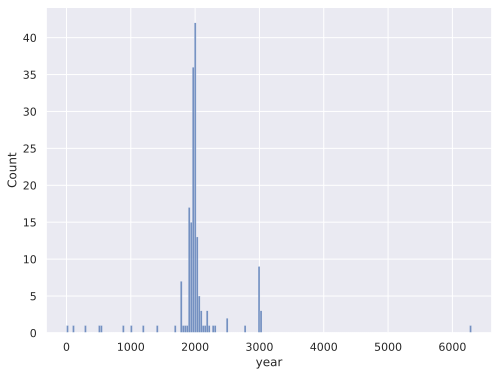

In [278]:
# histogram of somewhat cleaned time machine question
sns.histplot(year_series_numeric)
plt.show()

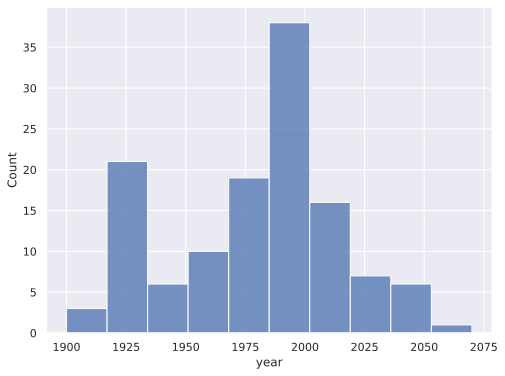

In [279]:
# histogram of somewhat cleaned time machine question restricted to 1900-2100
sns.histplot(year_series_numeric \
             .loc[year_series_numeric \
             .isin(range(1900, 2100))])
plt.show()

## Dealing with Whitespace in Strings
When humans are entering data they will often insert extraneous whitespace (things like spaces, tabs, or returns). To properly group or count such data we need to 'strip' away the extra whitespace. If we don't, Python will treat the string 'football' as different from the string ' football' or 'football '.

The string method `.strip()` will remove extraneous whitespace from before and after a string. The equivalent in Pandas is the method `.str.strip()`.

In [280]:
sport_series = df.loc[:, 'sport'] \
                 .dropna() \
                 .str.lower()

contains_football_mask = sport_series.str.contains('football')

sport_series[contains_football_mask].value_counts()

football                                                                                                                                40
football                                                                                                                                 4
basketball, football, baseball                                                                                                           2
soccer (the real football)                                                                                                               1
football or wrestling                                                                                                                    1
college football                                                                                                                         1
if video games count, super smash bros. if not, football. sometimes baseball when they're not playing the game and doing wacky stuff     1
football (mainstream) or so

Notice above that the first and second entries both appear to be `'football'`, but they are not the same to Python. `.str.strip()` will help us out here.

In [281]:
# using str.strip() to remove whitespace
sport_series.loc[contains_football_mask] \
            .str.strip() \
            .value_counts()

football                                                                                                                                44
basketball, football, baseball                                                                                                           2
soccer (the real football)                                                                                                               1
football or wrestling                                                                                                                    1
college football                                                                                                                         1
if video games count, super smash bros. if not, football. sometimes baseball when they're not playing the game and doing wacky stuff     1
football (mainstream) or something out there like rock climbing                                                                          1
football/basketball        

If you need to be a bit more careful about how you are stripping whitespace, the functions `str.lstrip()` and `str.rstrip()` are available to just strip whitespace on the left or on the right, respectively.

## Example with 'hangout'
Let's see if we can figure out the average for responses to the question: "What is the optimal number of people to hang out with?"


In [282]:
# drop duplicates
df_drop = df.drop_duplicates(subset = df.columns[1:])

# drop missing values
hangout_series = df_drop.loc[:, 'hangout']

# check the values
hangout_series.value_counts()

3                                          50
4                                          42
5                                          23
6                                          15
2                                          15
7                                           7
4-5                                         6
1                                           6
5-6                                         2
8                                           2
10                                          2
4-6                                         2
100                                         2
3-7, more is too crowded                    1
1-6                                         1
3-4                                         1
3 others (4 total)                          1
3 and me for a game of euchre               1
one                                         1
1-2                                         1
People with similar interests               1
20                                

In [283]:
# address range responses, like 4-5, by splitting on - and taking the first value
hangout_series_clean = hangout_series.str.split('-').str[0]

# check the values
hangout_series_clean.value_counts()

3                                          52
4                                          50
5                                          26
6                                          17
2                                          15
1                                           8
7                                           7
10                                          2
100                                         2
8                                           2
infinity                                    1
one                                         1
3 and me for a game of euchre               1
3 (4 including me)                          1
15                                          1
20                                          1
3 others (4 total)                          1
9                                           1
Five                                        1
4 (including me)                            1
5 or 6                                      1
People with similar interests     

In [284]:
# address mixed number response by splitting on ' '  and taking the first value of the resulting list
hangout_series_clean = hangout_series_clean.str.split(' ').str[0]

# check the values
hangout_series_clean.value_counts()

3           55
4           51
5           27
6           17
2           15
1            8
7            7
100          2
10           2
8            2
one          1
Five         1
20           1
15           1
depends,     1
Infinite     1
9            1
People       1
Unsure       1
11?          1
five         1
infinity     1
Name: hangout, dtype: int64

In [285]:
# address 'one', 'five', '11?', and 'infinite' using replace
hangout_series_clean = hangout_series_clean.str.lower()
hangout_series_clean = hangout_series_clean.str.replace('one', '1')
hangout_series_clean = hangout_series_clean.str.replace('five', '5')
hangout_series_clean = hangout_series_clean.str.replace('?', '')
hangout_series_clean = hangout_series_clean.str.replace('infinite', 'infinity')

# check the values
hangout_series_clean.value_counts()

3           55
4           51
5           29
6           17
2           15
1            9
7            7
10           2
infinity     2
8            2
100          2
9            1
unsure       1
depends,     1
20           1
15           1
11           1
people       1
Name: hangout, dtype: int64

In [286]:
# convert to numeric using coerce argument
hangout_series_clean = pd.to_numeric(hangout_series_clean, errors = 'coerce')

# check the values
hangout_series_clean.value_counts() 

3.0      55
4.0      51
5.0      29
6.0      17
2.0      15
1.0       9
7.0       7
inf       2
100.0     2
10.0      2
8.0       2
15.0      1
11.0      1
20.0      1
9.0       1
Name: hangout, dtype: int64

Note that infinite can be represented by some numeric data types, but including it does odd things to our mean and standard deviation statistics. 

In [287]:
# infinite does odd things to our descriptive statistics 
hangout_series_clean.describe() 

count    195.0
mean       inf
std        NaN
min        1.0
25%        3.0
50%        4.0
75%        5.0
max        inf
Name: hangout, dtype: float64

In [288]:
# use a mask to remove the infinite values which are represented as np.inf
import numpy as np # need this import to address the infinite value
hangout_series_clean = hangout_series_clean.loc[hangout_series_clean != np.inf]

# check the result
hangout_series_clean.describe() 

count    193.000000
mean       5.155440
std        9.970095
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max      100.000000
Name: hangout, dtype: float64

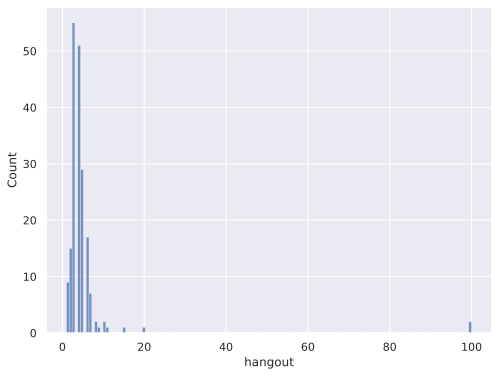

In [289]:
# histogram of somewhat cleaned hangout preference
sns.histplot(hangout_series_clean)
plt.show()

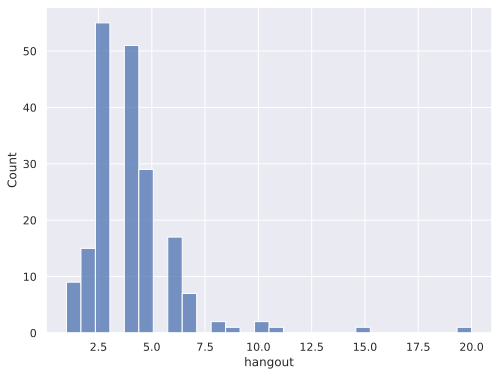

In [290]:
# histogram of somewhat cleaned hangout preference
sns.histplot(hangout_series_clean.loc[hangout_series_clean < 25])
plt.show()